#[실전예제]헬스케어 - 질병 데이터분석 '코로나 바이러스'

#코로나 바이러스 데이터 분석 - 환경 설정 및 데이터 구조 파악


##1. 라이브러리 import 및 데이터 업로드

###라이브러리 import

In [0]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

###csv 파일 업로드

In [0]:
from google.colab import files
uploaded = files.upload()

## 2. 데이터 구조 파악하기

###데이터 pandas로 불러오기

In [0]:
coronaDF = pd.read_csv("covid_19_clean_complete.csv")

###데이터 확인하기

In [0]:
coronaDF

###결측 값 확인

In [0]:
coronaDF.isnull().sum()

### 데이터 타입 조회

In [0]:
coronaDF.info()

### Date 정보 수정 (Object => datetime)

In [0]:
coronaDF['Date'] = pd.to_datetime(coronaDF['Date'])
coronaDF

# 코로나 바이러스 데이터 분석 - 국가별 최신 확진자, 사망자, 회복자 데이터 분석



### 최신 데이터만 남기기

In [0]:
latestDF = coronaDF[coronaDF['Date'] == max(coronaDF['Date'])]

### 국가별 합계 구하기

In [0]:
latest_country_sum = latestDF.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
latest_country_sum

### 사망자 높은 국가순으로 정렬하기

In [0]:
latest_country_sum = latest_country_sum.sort_values(by='Confirmed', ascending=False).reset_index(drop=True)
latest_country_sum

### 데이터 전체 조회하기


In [94]:
latest_country_sum.style.background_gradient(cmap='Reds')

# 코로나 바이러스 데이터 분석 - 시간에 따른 확진자, 사망자, 회복자 시각화

###날짜별 확진자, 사망자, 회복자 합계 구하기

In [0]:
date_status = coronaDF.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum()
date_status = date_status.sort_index()
date_status

### 시간에 따른 누적 확진자, 사망자, 회복자 그래프 (seaborn lineplot)

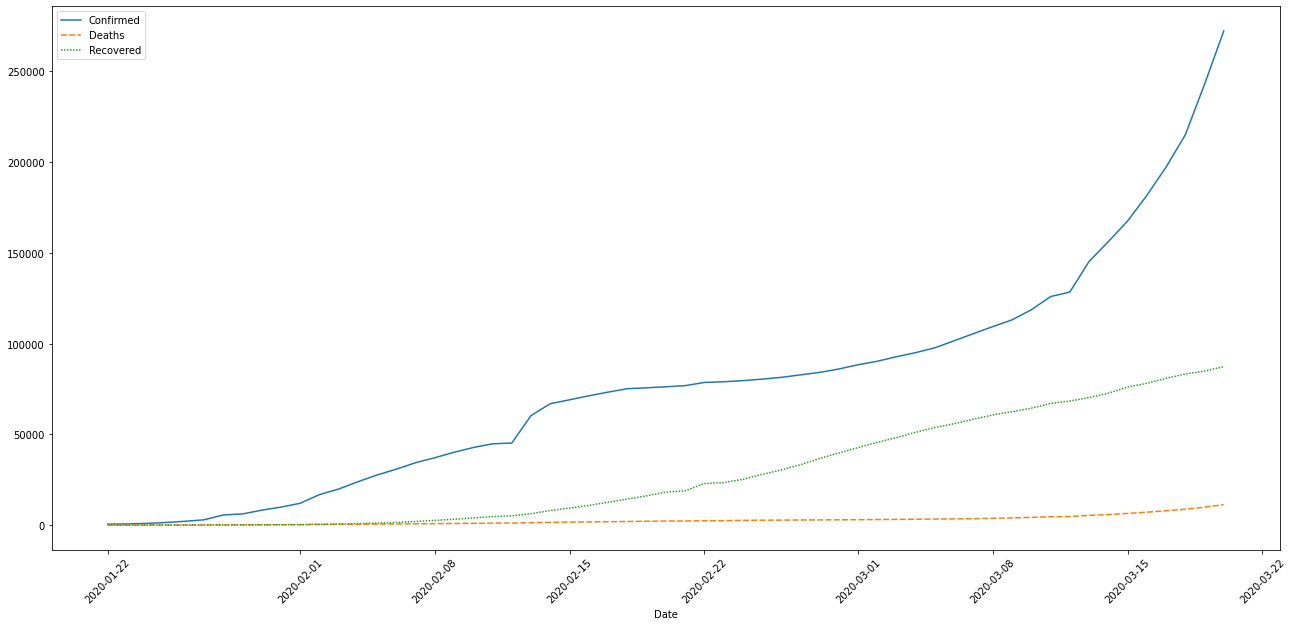

In [92]:
plt.figure(figsize=(22,10))
plt.xticks(rotation = 45 )
sns.lineplot(data=date_status)

# 전세계 코로나 바이러스 감염 지도 표시 - folium 라이브러리 소개 및 설명

### folium 사용해보기

In [0]:
import folium
m = folium.Map()
m

### folium으로 서울 지도 표시하기

In [0]:
m = folium.Map(location=[37.715133, 126.734086])
m

### zoom 조절하기

In [0]:
m = folium.Map(location=[37.559533, 126.972464], zoom_start=16)
m

### CircleMarker 그리기

In [0]:
m = folium.Map(location=[37.559533, 126.972464], zoom_start=16)
folium.CircleMarker([37.559533, 126.972464], radius=100).add_to(m)
m

### CircleMarker 색상, 채우기, 채우기 색상 설정

In [0]:
m = folium.Map(location=[37.559533, 126.972464], zoom_start=16)
folium.CircleMarker([37.559533, 126.972464], radius=100, color="#ef9008", fill="True", fill_color="#ef9008").add_to(m)
m

### CircleMarker로 popup 표시

In [0]:
m = folium.Map(location=[37.559533, 126.972464], zoom_start=16)
folium.CircleMarker([37.559533, 126.972464], radius=100, color="#ef9008", fill="True", fill_color="#ef9008", popup="hi").add_to(m)
m

#전세계 코로나 바이러스 감염 지도 표시 - 전세계 코로나 바이러스 감염 지도 시각화

### 국가별 최신 확진자 데이터 조회

In [0]:
latestDF

### 지도에 전세계 국가별 확진자 수 CircleMarker로 표시

In [93]:
m = folium.Map(location=[0, 0], zoom_start=4)
for n in latestDF.index:
    folium.CircleMarker([latestDF['Lat'][n], latestDF['Long'][n]], radius = int(latestDF['Confirmed'][n]/1000)
    , color='red', fill="True", fill_color='red', popup=latestDF['Country/Region'][n] + ":" + str(latestDF['Confirmed'][n])).add_to(m)
m